In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('jpeg', 'pdf')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 150
sns.rcmod.set({'figure.figsize': (15, 5)})

## Read the data

In [91]:
df = pd.read_csv('./data/listings-detailed.csv')

## Cleaning Price
The price colum represents the the listing price in `$`. Remove the `$` sign and remove the comma seprator of large numbers. Then convert the tipe to `float`

In [92]:
# remove `$` from price cells
df['price'] = df['price'].apply(lambda x: x[1:] if x[0] == '$' else x)
# remove comma for large number
df['price'] = df['price'].apply(lambda x: x.replace(',', ''))
# make price type as `float`
df['price'] = df['price'].astype(float)
df['price'].sample(5)

22406    152.0
9544      50.0
12243     58.0
9811     120.0
2642     120.0
Name: price, dtype: float64

## The Price Average for Each Room Type
We see that, in avegrage, the Hotel Room and the Entire Room types are the best choice to invest in.

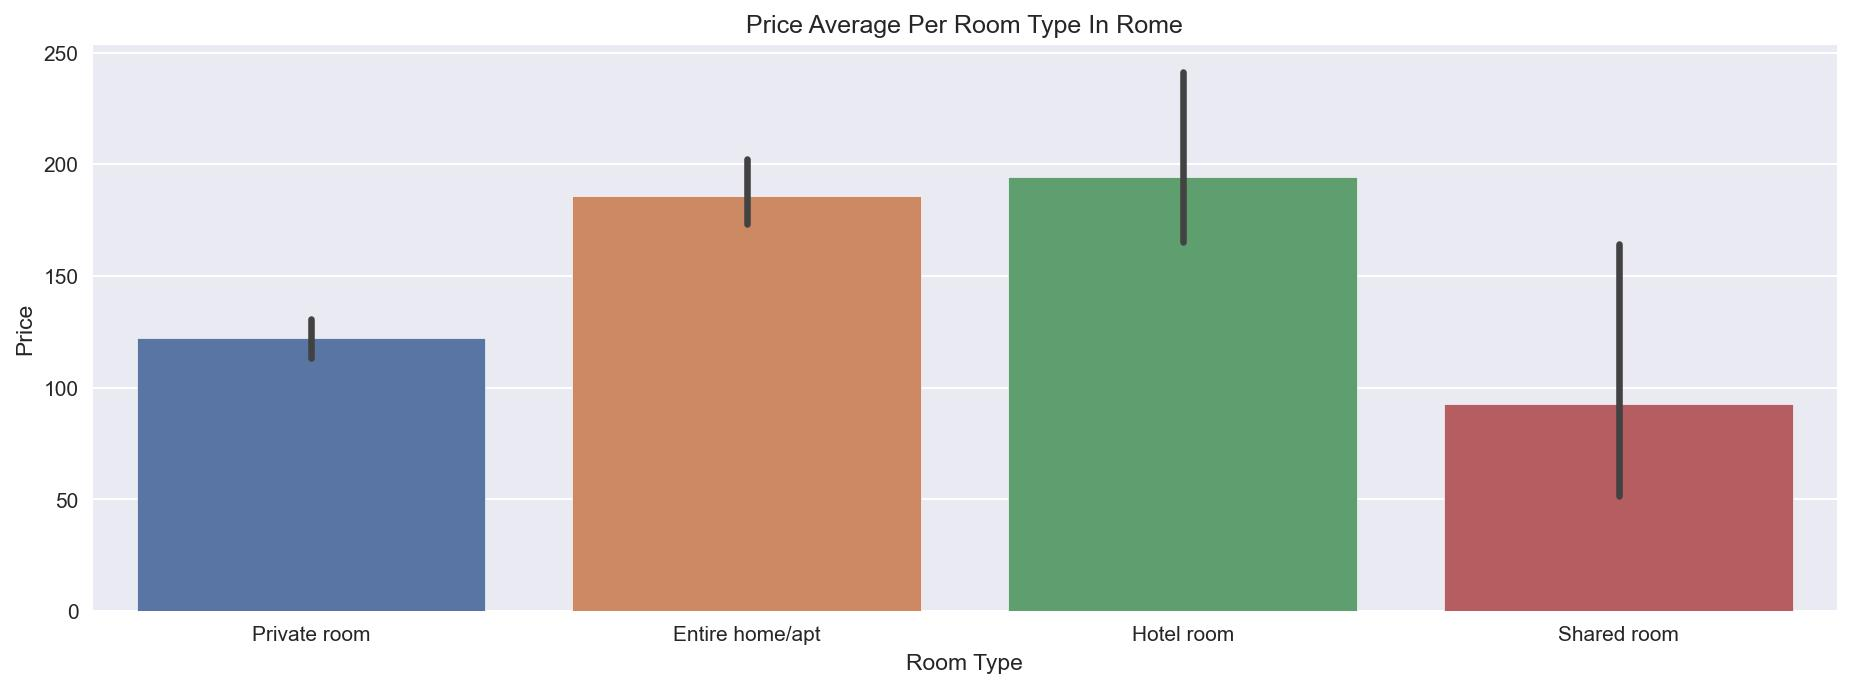

In [94]:
sns.barplot(data=df, x='room_type', y='price')
plt.title('price average per room type in rome'.title())
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

## The Score Rating for Each Room Type
We see that all room types are almost 5-start rating. Further, the Entire Home/Apt  has the lowest varience and the highest score rating average (4.7/5.0).

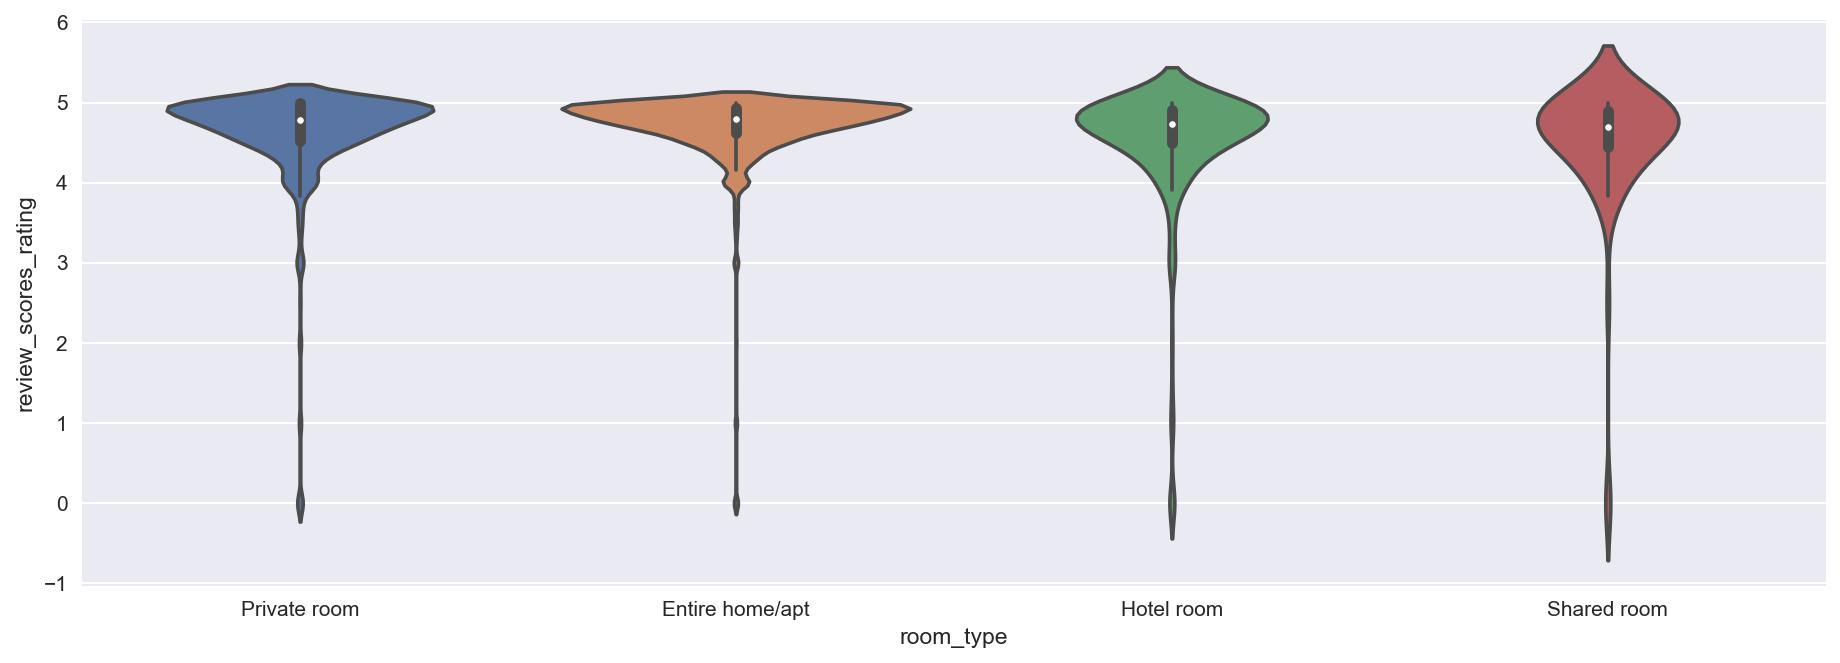

In [95]:
sns.violinplot(x='room_type', y='review_scores_rating', data=df)
plt.show()

## The Most Expensive Neighbourhoods
We find that the *XI Arvalia/Portuense* neighbourhood has the most expensive lisitings on average.
This suggests that it is a good place to invest with high prices.

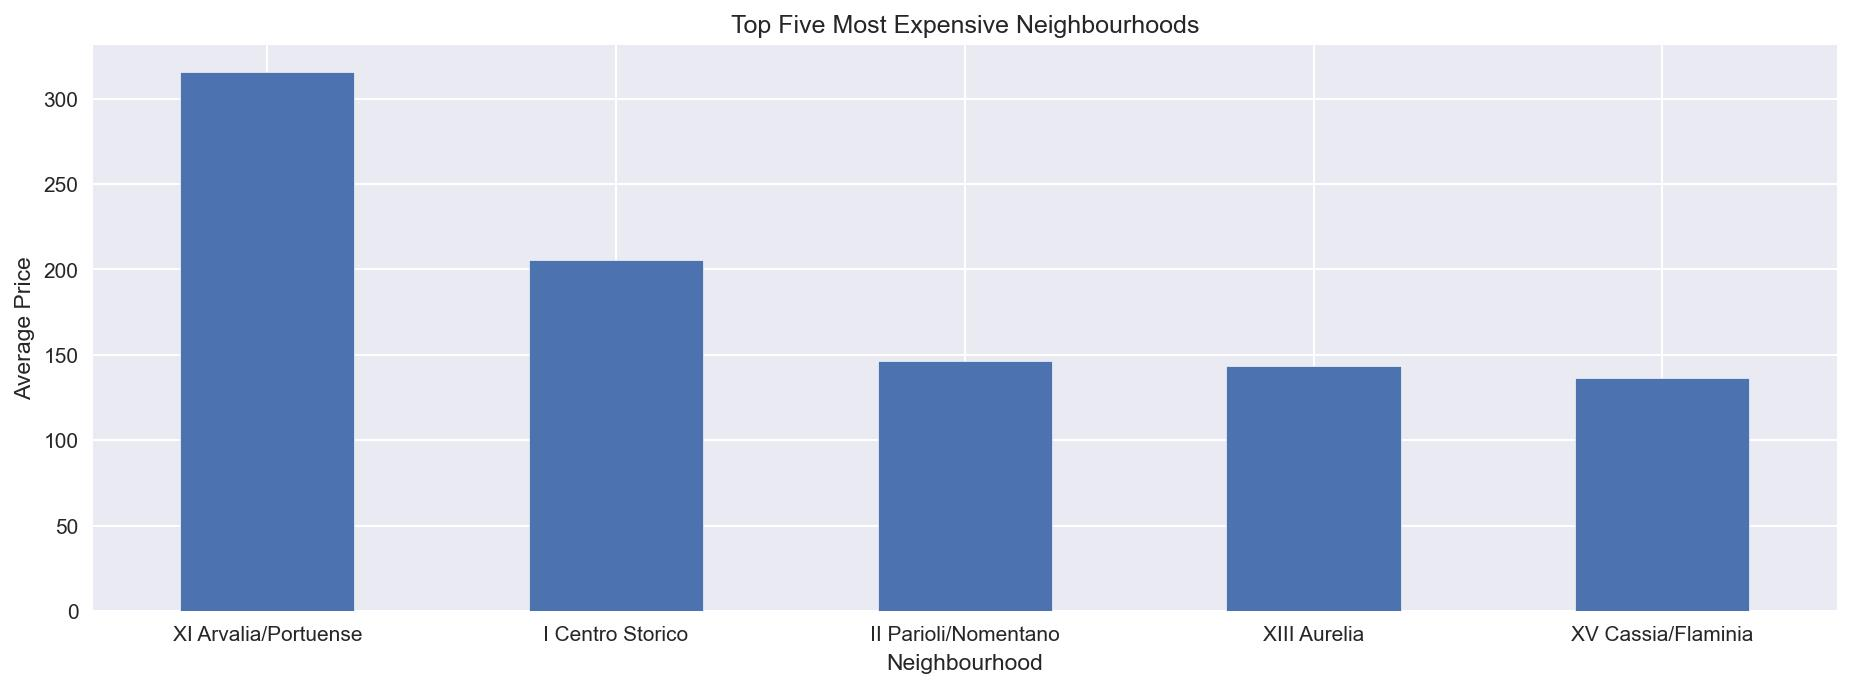

In [119]:
df.groupby("neighbourhood_cleansed")["price"].mean().nlargest(5).plot.bar()
plt.title('top five most expensive neighbourhoods'.title())
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

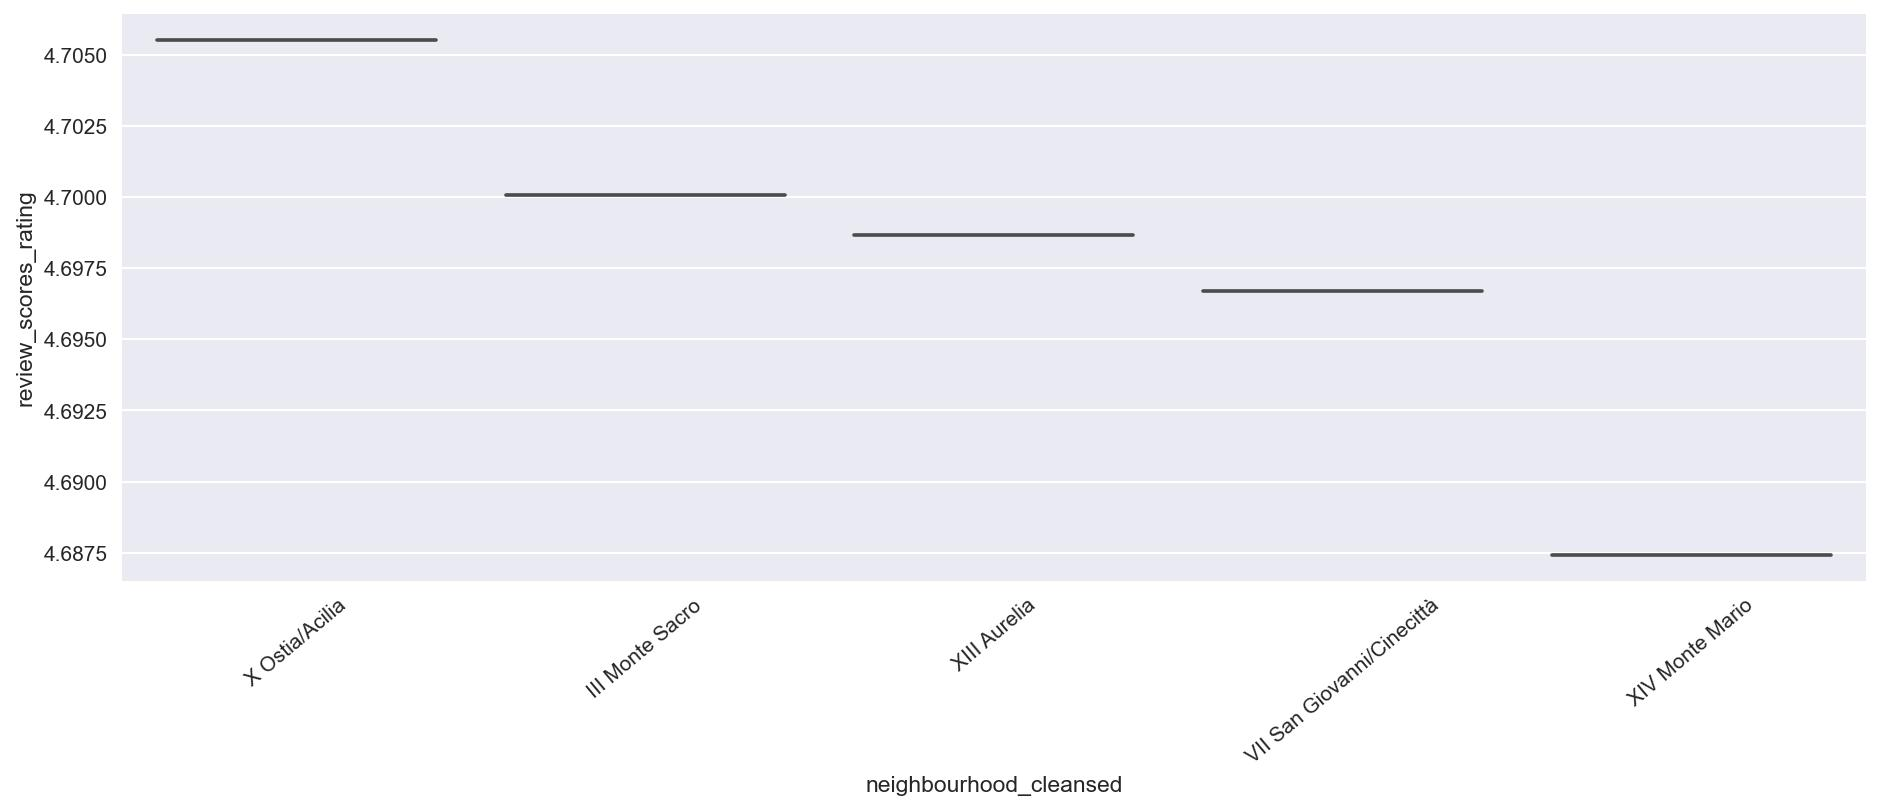

In [118]:
data = df.groupby(['neighbourhood_cleansed'])[['review_scores_rating']].mean().nlargest(5, 'review_scores_rating')
data.columns
sns.violinplot(x=data.index, y='review_scores_rating', data=data)
plt.xticks(rotation=40)
plt.show()

In [88]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--r')

In [72]:
# drop listings whose price more the $10_000
data = df.drop(df[df['price'] > 10_000].index)
data['price'].nlargest(10)

9646     9999.0
15870    9356.0
15876    9356.0
12037    9143.0
12021    8999.0
22457    8999.0
15877    8977.0
15844    8900.0
15847    8900.0
15848    8900.0
Name: price, dtype: float64

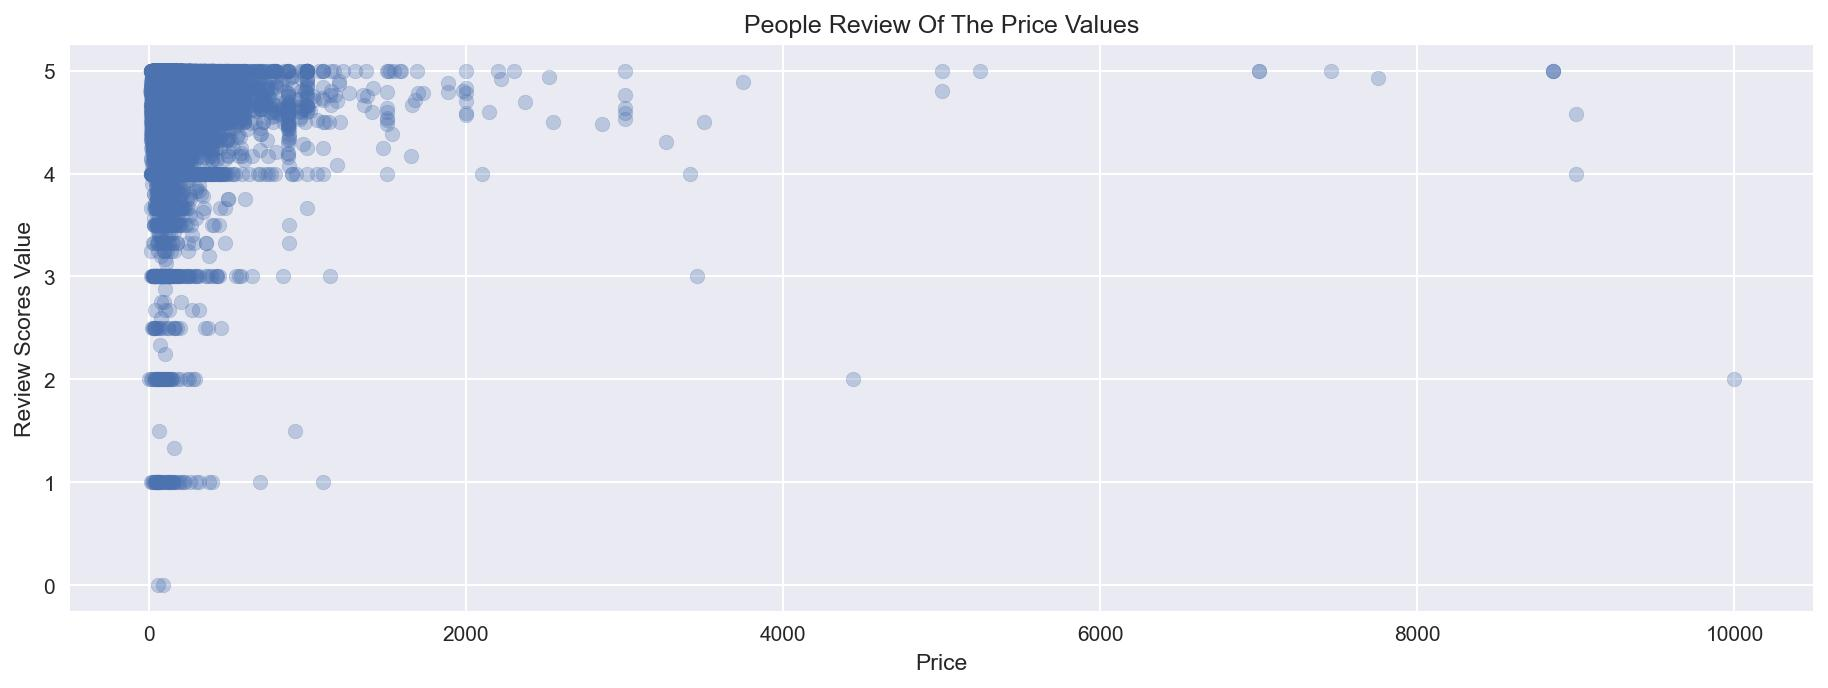

In [73]:
plt.scatter(x=data['price'], y=data['review_scores_value'], alpha=0.3)
plt.title('people review of the price values'.title())
plt.xlabel('Price')
plt.ylabel('review scores value'.title())
plt.show()

In [79]:
model = ols('review_scores_value ~ price', data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     review_scores_value   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     12.84
Date:                 Wed, 06 Jul 2022   Prob (F-statistic):           0.000340
Time:                         09:48:58   Log-Likelihood:                -9733.7
No. Observations:                19841   AIC:                         1.947e+04
Df Residuals:                    19839   BIC:                         1.949e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6754      0.003   1457.006      0.000       4.669       4.682
price      -3.908e-05   1.09e-05     -3.583      0.000   -6.05e-05   -1.77e-05
==============================================================================
Omnibus:                    17281.362   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           673666.432
Skew:                          -4.095   Prob(JB):                         0.00
Kurtosis:                      30.346   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
sm.stats.anova_lm(result, typ=2)

,sum_sq,df,F,PR(>F)
price,2.005825,1.0,12.841272,0.00034
Residual,3098.880265,19839.0,NaN,NaN


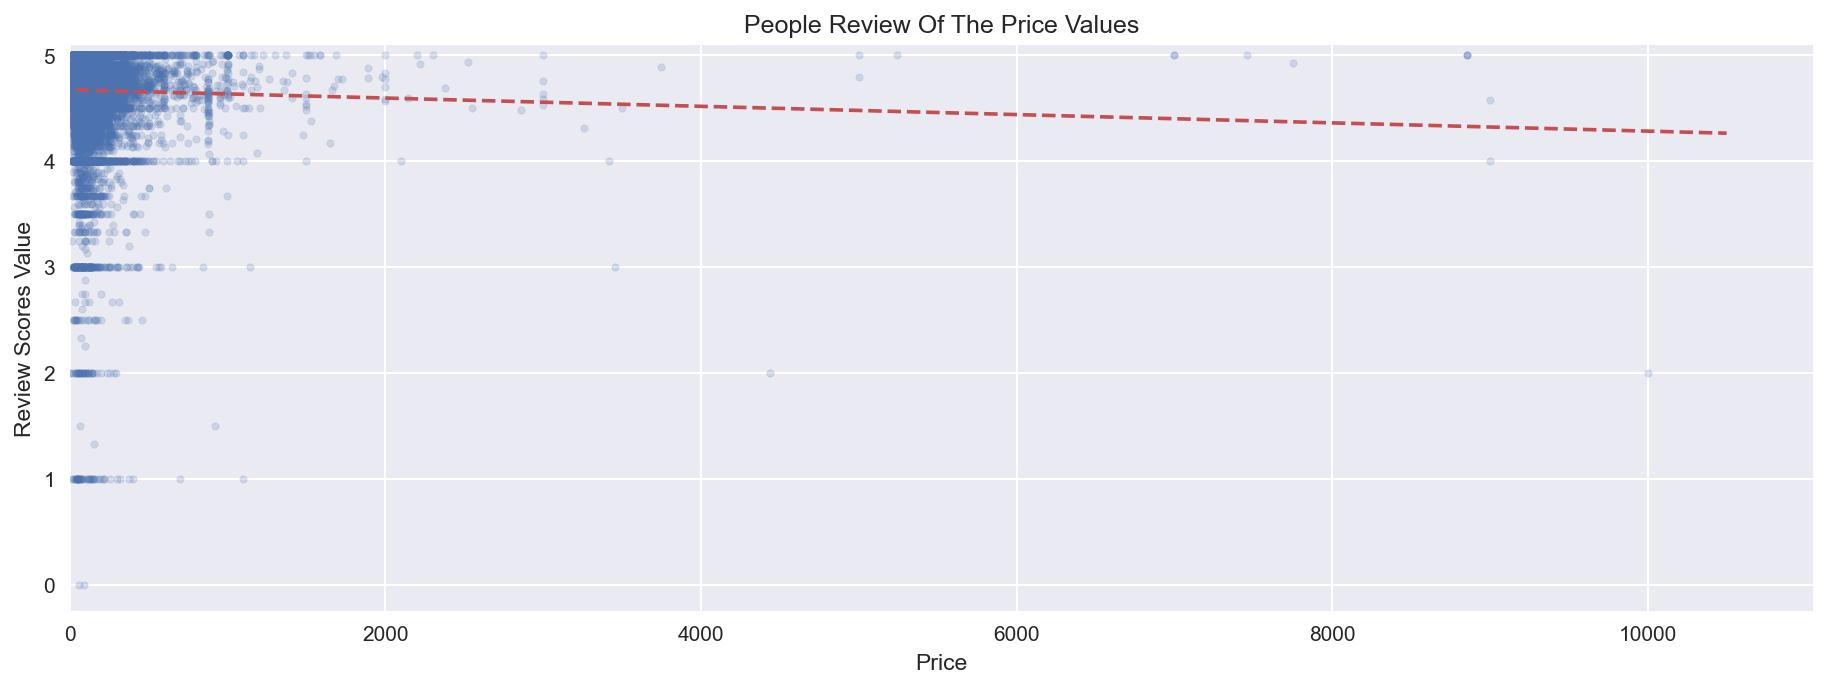

In [89]:
plt.scatter(x=data['price'], y=data['review_scores_value'], alpha=0.2, marker='.')
abline(result.params[-1], result.params[0])
plt.title('people review of the price values'.title())
plt.xlabel('Price')
plt.ylabel('review scores value'.title())
plt.xlim(left=-0.1); plt.ylim(top=5.1)
plt.show()